<a href="https://colab.research.google.com/github/aytekin827/TIL/blob/main/BVP_to_BPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

# BVP 데이터 BPM데이터로 변환 실습

**BVP데이터 설명**


BVP 데이터는 Blood Volume Pulse(혈액 부피 맥파)의 약어로서, 심장 박동과 관련된 혈액의 부피 변화를 측정한 데이터입니다. 이 데이터는 주로 광학적 센서를 사용하여 손가락이나 팔목과 같은 부위에 부착된 센서로부터 측정됩니다.

BVP 데이터는 주기적으로 심장의 수축과 이완에 의해 혈액의 부피가 변화함에 따라 생성됩니다. 심장 수축 때 혈액이 동맥로부터 조금씩 밀려 나가게 되고, 이완 때에는 혈액이 다시 채워지면서 혈액 부피가 변화하게 됩니다. 이러한 혈액 부피 변화는 혈압 파동과도 관련되어 있으며, 심장 박동 주기와 동기를 맞춰 주기적인 맥박 신호를 형성합니다.

BVP 데이터는 주로 의료 분야에서 심박수(Heart Rate, HR)를 추출하는 데 사용됩니다. HR은 분당 박동 수로 표현되며, 이는 인간의 심장이 1분 동안 얼마나 많이 뛰는지를 나타냅니다. HR은 건강 상태, 운동량, 스트레스 수준 등 다양한 생리학적 및 심리학적 요인과 관련이 있어서 의료 진단, 생체 신호 감시, 생체 피드백 장치, 생체 인식 등에 널리 활용됩니다.

BVP 데이터는 주로 시간에 따른 혈액 부피 변화를 포함하는 시계열 데이터로 구성됩니다. 이러한 데이터를 활용하여 Peak Detection 등의 방법을 사용하여 심장 박동수를 추출하고, 건강 상태나 신체 활동을 모니터링하는 데에 활용됩니다.

### 데이터 불러오기


In [7]:
# BVP 데이터를 CSV 파일로부터 불러오기
data = pd.read_csv("/content/drive/MyDrive/rPPG/toadstool/participant_0/participant_0_sensor/BVP.csv",names=['BVP'], header=None)
data.head(10)

,BVP
0,15.96
1,17.92
2,21.60
3,24.59
4,25.34
5,23.42
6,19.28
7,13.68
8,7.12
9,-0.42


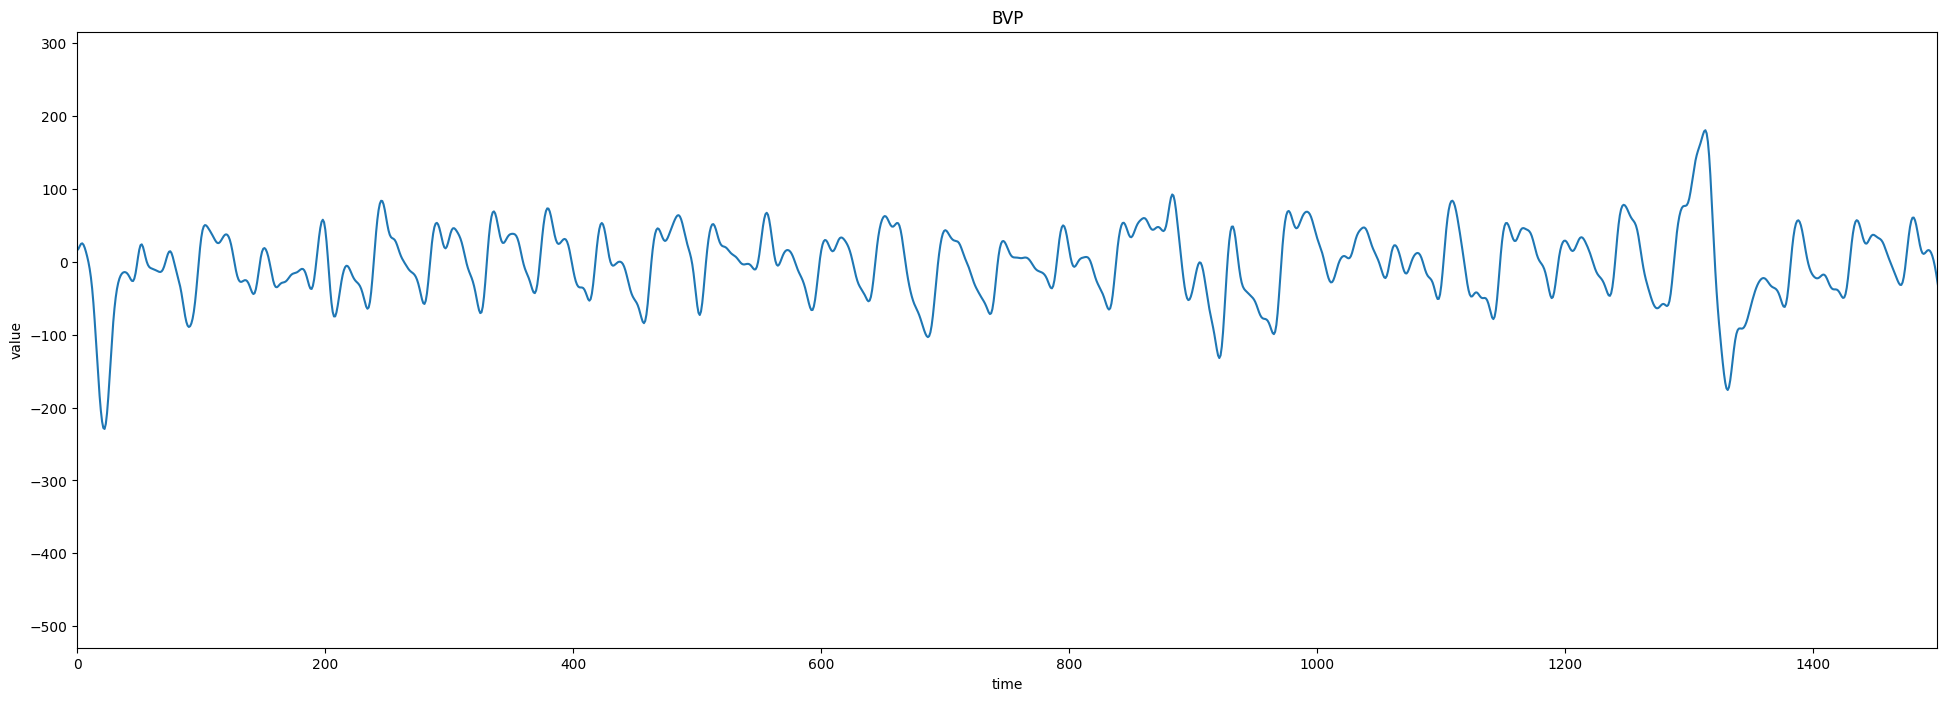

In [36]:
plt.figure(figsize=(24, 8))

plt.plot(data.BVP)
plt.xlim(0,1500)
plt.title('BVP')
plt.xlabel('time')
plt.ylabel('value')
plt.show()

### 데이터전처리

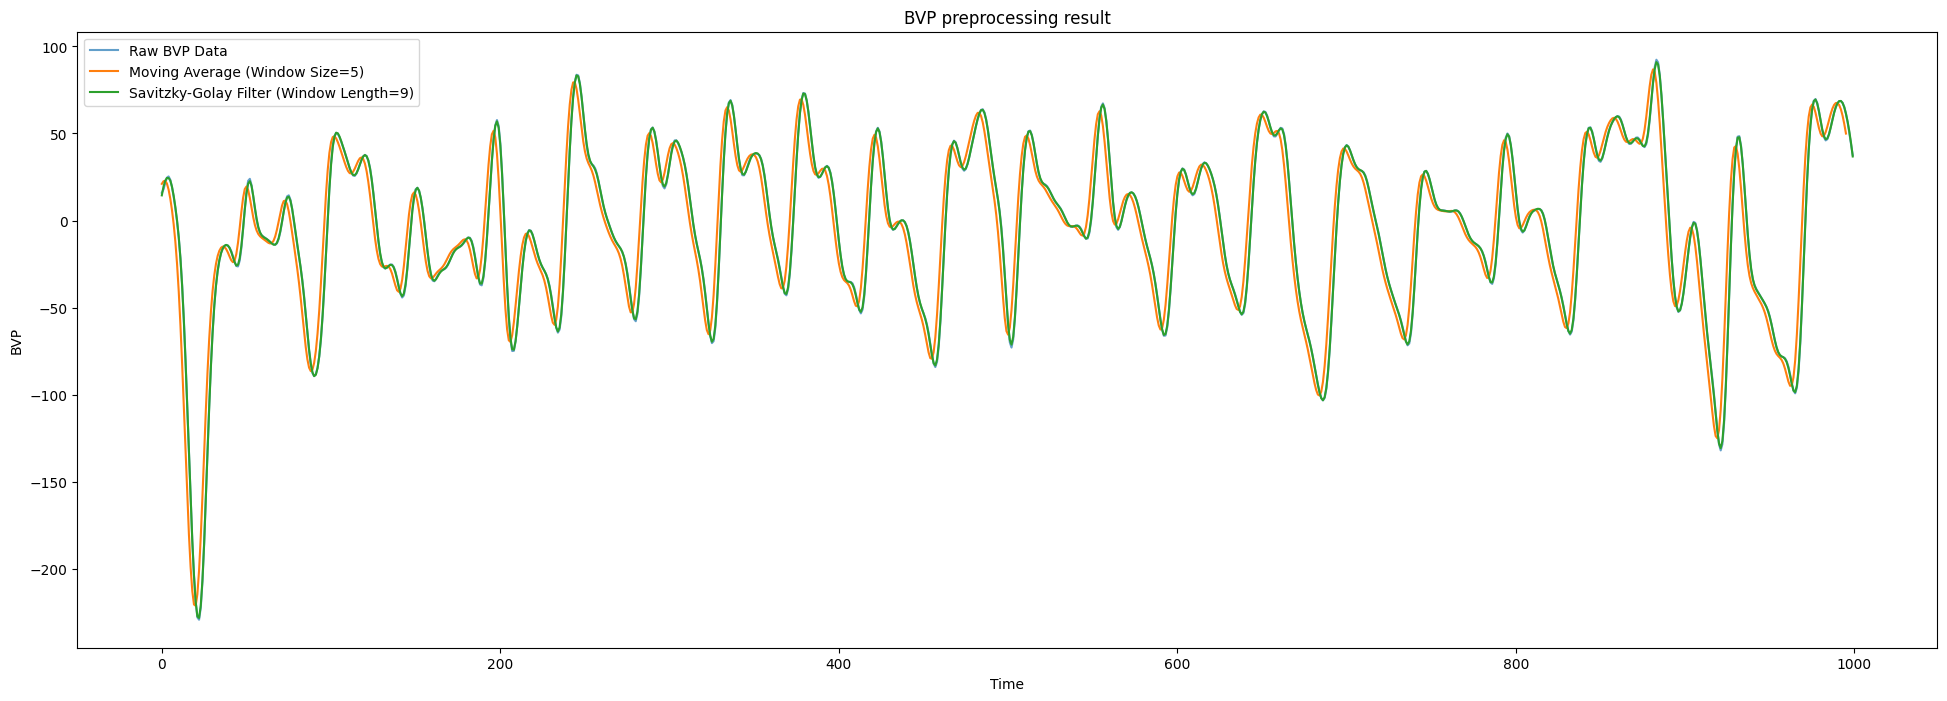

In [35]:
# 이동평균 방법으로 BVP 데이터를 전처리
bvp_value = data.BVP[:1000]

window_size = 5  # 이동평균 창 크기를 지정합니다. 적절한 값으로 조정 가능
bvp_smoothed = np.convolve(bvp_value, np.ones(window_size)/window_size, mode='valid')

# 필터링 방법으로 BVP 데이터를 전처리 (예시로 Savitzky-Golay 필터 사용)
from scipy.signal import savgol_filter
window_length = 9  # 필터 윈도우 크기를 지정합니다. 적절한 값으로 조정 가능
bvp_filtered = savgol_filter(bvp_value, window_length, polyorder=2)

# 시각화
plt.figure(figsize=(24, 8))
plt.plot(bvp_value, label='Raw BVP Data', alpha=0.7)
plt.plot(bvp_smoothed, label=f'Moving Average (Window Size={window_size})')
plt.plot(bvp_filtered, label=f'Savitzky-Golay Filter (Window Length={window_length})')
plt.xlabel('Time')
plt.ylabel('BVP')
plt.legend()
plt.title('BVP preprocessing result')
plt.show()

큰 차이 없는것같음


### Peak Detection

심장 박동수(BPM) 추출 결과:
[27.04225352 28.65671642 36.22641509 ... 42.66666667 44.65116279
 39.58762887]


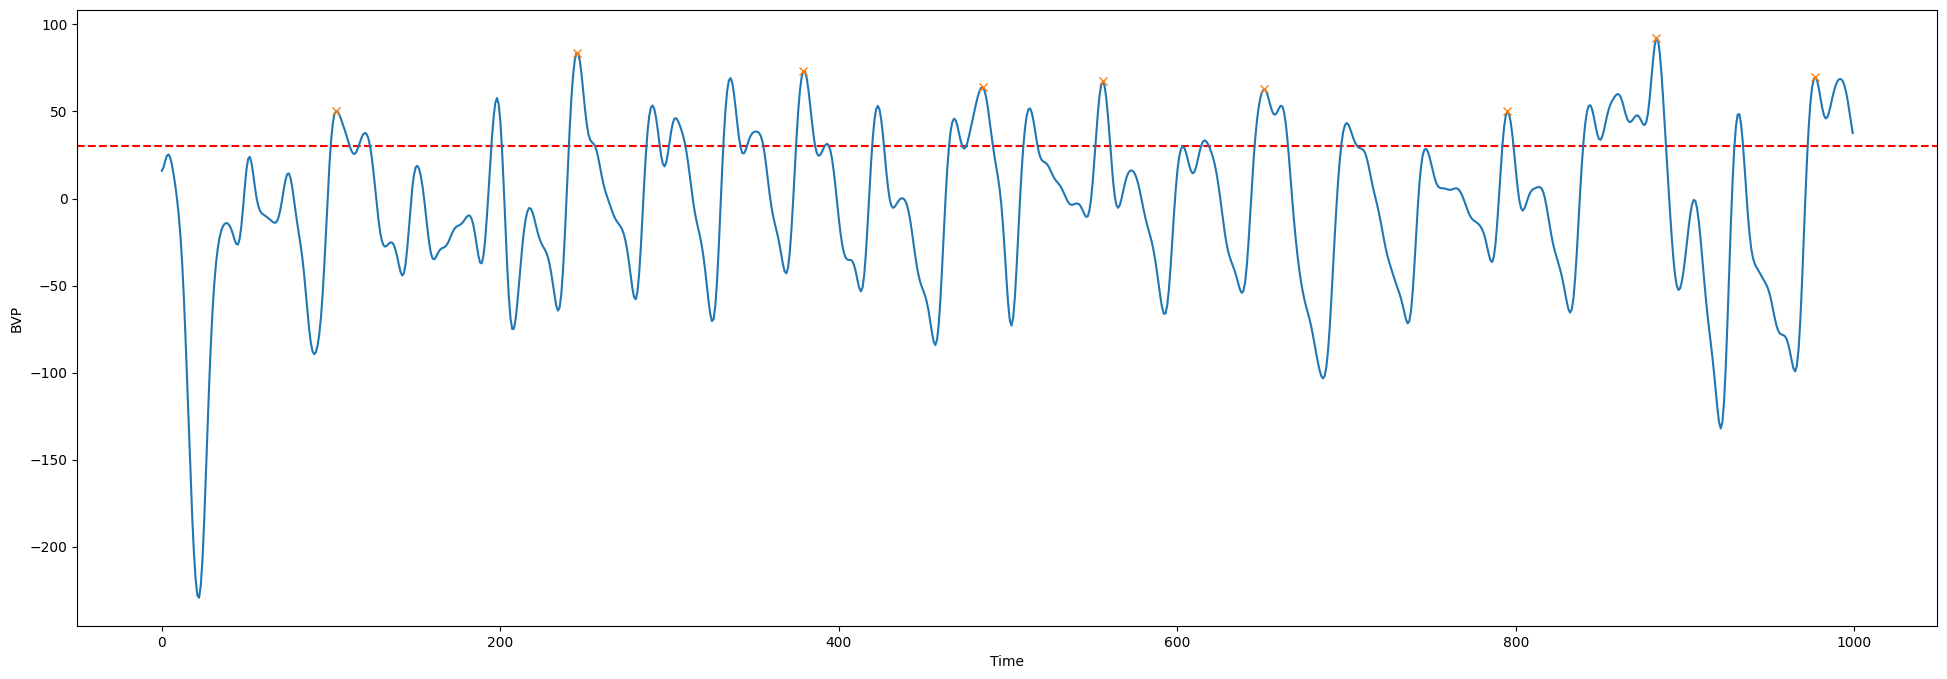

In [83]:
# Peak Detection (최대값 검출)

sampling_rate = 64 # (64 Hz)
height_threshold = 30

# height, distance 등의 매개변수는 데이터에 따라 적절히 조정해야합니다.
peaks, _ = find_peaks(data.BVP, height=height_threshold, distance=sampling_rate)  # 64 BVP 데이터의 샘플링 주기 (64 Hz)입니다.

# 심장 박동 주기(심박 간격) 계산
heart_rate_periods = np.diff(peaks) / sampling_rate  # 주기를 초 단위로 변환
heart_rate_bpm = 60.0 / heart_rate_periods  # 주기를 분당 박동 수로 변환 (BPM)

# 결과 출력
print("심장 박동수(BPM) 추출 결과:")
print(heart_rate_bpm)

# 시각화 (선택 사항)
plt.figure(figsize=(24, 8))

limit_n = 1000
bvp_values = data.BVP[:limit_n]
peaks_adj = peaks[peaks<limit_n]

plt.axhline(y=height_threshold, color='red', linestyle='--', label='수평선')
plt.plot(bvp_values)
plt.plot(peaks_adj, bvp_values[peaks_adj], 'x')
plt.xlabel('Time')
plt.ylabel('BVP')
plt.show()

In [ ]:

# 심장 박동 주기(심박 간격) 계산
heart_rate_periods = np.diff(peaks) / 32.0  # 주기를 초 단위로 변환 (32 Hz 샘플링이므로)
heart_rate_bpm = 60.0 / heart_rate_periods  # 주기를 분당 박동 수로 변환 (BPM)

# 결과 출력
print("심장 박동수(BPM) 추출 결과:")
print(heart_rate_bpm)

# 시각화 (선택 사항)
plt.plot(bvp_values)
plt.plot(peaks, bvp_values[peaks], 'x')
plt.xlabel('Time')
plt.ylabel('BVP')
plt.title('BVP 데이터와 추출된 심장 박동 위치')
plt.show()


# biosppy 라이브러리 이용


In [ ]:
!pip install biosppy

In [93]:
from biosppy.signals import ppg

res = ppg.ppg(data.BVP, 64, False)

In [94]:
print(res[4].__len__())
res[4]

2663


array([108.1533101 , 103.60046458,  99.61499493, ...,  87.39318652,
        82.51699605,  79.02608696])

---

In [86]:
heart_rate = pd.read_csv('/content/drive/MyDrive/rPPG/toadstool/participant_0/participant_0_sensor/HR.csv', names=['HR'], header=None)
heart_rate

,HR
0,90.55
1,90.55
2,90.55
3,90.55
4,90.55
...,...
124455,81.13
124456,81.13
124457,81.13
124458,81.13
